#PRÁCTICA FINAL NLP

En esta práctica abordaremos los temas tratados en las clases de NLP.
Para ello, he elegido un dataset de los propuestos por el profesor. El elegido ha sido sobre instrumentos musicales, ya que soy saxofonista desde los 10 años y es un tema más afín a mis conocimientos, además de que me gusta el tema.



---



Antes de empezar con los ejercicios propuestos, vamos a cargar los datos y librerías necesarias.

En la siguiente celda importamos las librerías necesarias para el desarrollo de la práctica.

In [ ]:
import pandas as pd
import gzip
import json
import spacy
import en_core_web_sm
import re # Import the 're' module for regular expressions
import string # Import the 'string' module for punctuation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Ahora, definiremos la ubicación de nuestro conjunto de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pwd

/content


In [ ]:
WORKING_PATH = '/content/drive/MyDrive/Colab Notebooks/NLP_KeepCodingBDML14/Project'

In [ ]:
%cd {WORKING_PATH}

/content/drive/MyDrive/Colab Notebooks/NLP_KeepCodingBDML14/Project


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/NLP_KeepCodingBDML14/Project/Datasets/reviews_Musical_Instruments_5.json.gz"

Una vez que hemos fijado la dirección, vamos a empezar con el primer ejercico de la práctica.

## Ej. 1. Descarga y exploración del corpus
El alumno descargará el/los corpus que desee (detalle sobre los datos a utilizar en
el siguiente punto) y realizará un análisis exploratorio de los datos.
Este ejercicio deberá contener:
- Cardinalidad del vocabulario
- Distribución de reviews por número de estrellas
- Nº de reviews positivas y negativas
- N-grams más frecuentes
- Nubes de palabras
- Visualización en 2 dimensiones de algunos word embeddings calculados con
Word2Vec (elegir 4-5 palabras y pintar las top 10 más similares)
- Conclusiones de la exploración
- Cualquier otra métrica / exploración / cálculo que el alumno considere



---



Vamos a extraer los datos del dataset y estudiar un poco los datos.

In [ ]:
data = []
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

In [ ]:
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10261 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


Podemos ver en la celda anterior que tenemos un conjunto de datos con 10261 entradas, las cuales están ordenadas en 9 columnas:


1.  **reviewerID:** Identificador del usuario que hizo la review.
2.  **asin:** Código del producto en Amazon.
3.  **reviewerName:** Nombre del usuario.
4.  **helpful:** Lista con dos valores [votos_útiles, votos_totales].
5.  **reviewText:** Texto de la reseña.
6.  **overall:** Puntuación dada (de 1 a 5 estrellas).
7.  **summary:** Resumen breve de la reseña.
8.  **unixReviewTime:** Fecha de la reseña en formato Unix timestamp.
9.  **reviewTime:** Fecha en formato legible.







Una vez tratado el texto, vamos a hacer un análisis exploratirio de los datos:

### Cardinalidad
Estudiaremos la cardinalidad (Recuento de palabras únicas de las reviews). Lo haremos antes de quitar las stopwords para estudiar la cardinalidad en el texto original.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["reviewText"])

vocabulary = vectorizer.vocabulary_

cardinality = len(vocabulary)

print(f"La cardinalidad del vocabulario es: {cardinality}")

La cardinalidad del vocabulario es: 20551


Vamos a comparar el número de palabras únicas con el número total de palabras para ver la "riqueza léxica" del texto.

In [ ]:
total_words = df["reviewText"].dropna().apply(lambda x: len(x.split())).sum()
riqueza=cardinality/total_words
print(f"La riqueza léxica del texto es: {riqueza}")

La riqueza léxica del texto es: 0.0222083899322542


Podemos ver el el 22.2% de las palabras del corpus son palabras únicas.
Parece que los textos no tienen mucha complejidad, pero para nuestro estudio nos conviene para encontrar patrones que nos ayuden a detectar el sentimiento.

###Distribución de reviews por número de estrella

Vamos a hacer un histograma que ordene las reviews por calificación haga un recuento total por número de estrellas. Para ello vamos a utilizar la biblioteca de *seaborn*

<ipython-input-13-c143fe1cc6f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["overall"].value_counts().sort_index().index,


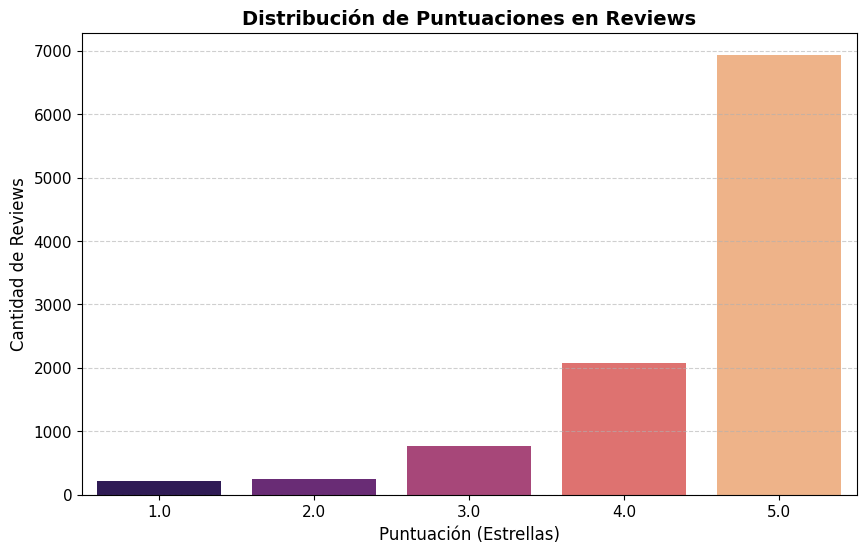

In [ ]:
import seaborn as sns

# Configuración de estilos
plt.figure(figsize=(10, 6))
sns.barplot(x=df["overall"].value_counts().sort_index().index,
            y=df["overall"].value_counts().sort_index().values,
            palette="magma")

# Personalización del gráfico
plt.title("Distribución de Puntuaciones en Reviews", fontsize=14, fontweight="bold")
plt.xlabel("Puntuación (Estrellas)", fontsize=12)
plt.ylabel("Cantidad de Reviews", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Mostrar gráfico mejorado
plt.show()


Vemos que en general, las reviews son bastante buenas.

###Nº de reviews positivas y negativas

Vamos a hacer un histograma que ordene muestre las reviews positivas y las negativas. Diremos que las negativas son 1, 2 y 3 estrellas y positivas a partir de 4 estrellas.

<ipython-input-28-0af8324b20ee>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=assessment_counts.index, y=assessment_counts.values, palette="coolwarm")


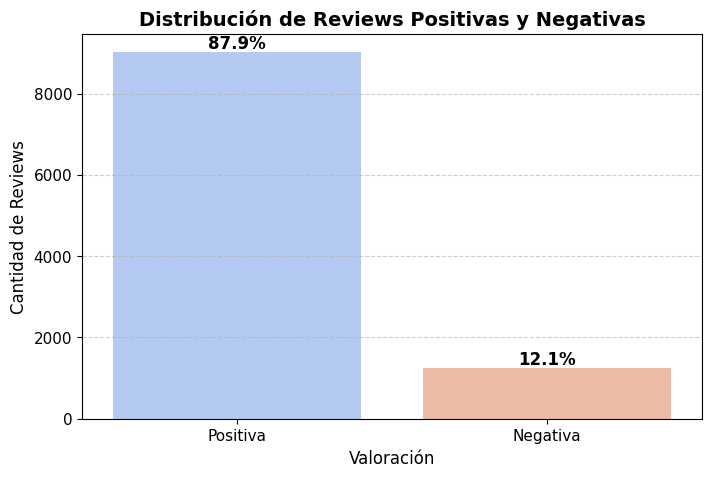

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna para clasificar las reviews en positivas y negativas
df["assessment"] = df["overall"].apply(lambda x: "Positiva" if x >= 4 else "Negativa")

# Contar el número de reviews positivas y negativas
assessment_counts = df["assessment"].value_counts()

# Calcular los porcentajes
total_reviews = assessment_counts.sum()
percentage_labels = [(count / total_reviews) * 100 for count in assessment_counts]

# Crear el histograma de distribución
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=assessment_counts.index, y=assessment_counts.values, palette="coolwarm")

# Añadir etiquetas con los porcentajes
for i, p in enumerate(ax.patches):
    ax.annotate(f"{percentage_labels[i]:.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold")

# Personalización del gráfico
plt.title("Distribución de Reviews Positivas y Negativas", fontsize=14, fontweight="bold")
plt.xlabel("Valoración", fontsize=12)
plt.ylabel("Cantidad de Reviews", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Mostrar gráfico
plt.show()



En esta gráfica podemos ver que definitivamente, las reviews reflejan más valoraciones positivas que negativas.

Nos enfrentamos a un conjunto de datos muy desbalanceado, tendremos que tener en cuenta esto para el análisis de los resultados finales.

###N-grams más frecuentes

Vamos a estudiar los N-grams más frecuentes que son los conjuntos de palabras que se repiten en el mismo orden. Vamos a estudiar Bigramas (pares de palabras) y los Trigramas (conjunto de 3 palabras).

In [ ]:
!pip install -U nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

df['tokenized_review'] = df['reviewText'].apply(word_tokenize)

bigrams_ = [list(ngrams(tokens, 2)) for tokens in df['reviewText']]

all_bigrams = [bigram for sublist in bigrams_ for bigram in sublist]

bg_freq = FreqDist(all_bigrams)
bg_freq.most_common(10)

[(('e', ' '), 147178),
 ((' ', 't'), 124424),
 (('t', ' '), 101896),
 (('t', 'h'), 101568),
 ((' ', 'a'), 100851),
 (('s', ' '), 92467),
 (('h', 'e'), 77554),
 (('d', ' '), 75179),
 (('i', 'n'), 62942),
 ((' ', 's'), 59097)]

In [ ]:
df['tokenized_review'] = df['reviewText'].apply(word_tokenize)

trigrams_ = [list(ngrams(tokens, 3)) for tokens in df['tokenized_review']]

all_trigrams = [trigram for sublist in trigrams_ for trigram in sublist]

tg_freq = FreqDist(all_trigrams)
tg_freq.most_common(10)

[(('&', '#', '34'), 1155),
 (('#', '34', ';'), 1155),
 (('.', 'It', "'s"), 913),
 (('.', 'I', 'have'), 875),
 (('I', 'do', "n't"), 802),
 ((',', 'but', 'I'), 657),
 (('.', 'If', 'you'), 625),
 (('.', 'It', 'is'), 554),
 ((',', 'but', 'it'), 553),
 ((',', 'and', 'I'), 491)]

Creo que los resultados de los bigramas y los trigramas no son buenos porque está dando como resulado conjuntos de palabras que no son relevantes. Después podemos volver a repetir este ejercicio con los textos normalizados y sin stopwords.

###Nubes de Palabras

A continuación vamos a representar una nube de palabras utilizando la *WordCloud*.

In [ ]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

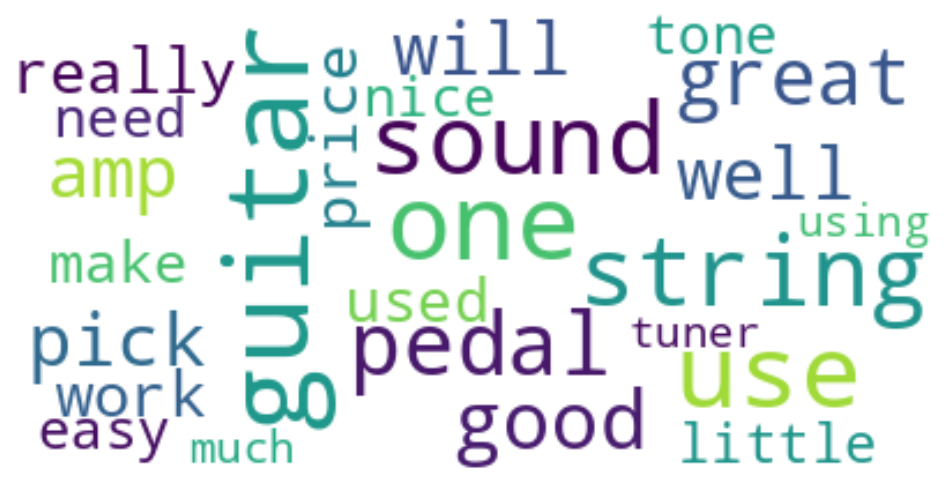

In [ ]:
text=" ".join(df["reviewText"].dropna())
words_list = text.lower().strip().split()
plot_word_cloud(text.lower())

Podemos ver que la mayoría de las reviews están enfocadas a un instrumento en particular. Las reviews de guitarras eléctricas y sus accesorios tienen más peso, aunque también vemos palabras que pueden ser más generales como "tone" "string" que puede ser de guitarra, pero también de otros instrumentos como violín o arpa. Pero sin duda palabras como "pedal", "amp", "pick" y "guitar" nos hace pensar que la mayoría de las reviews están efoadas a este instrumento.

####Chiste Gráfico

Esta librería etá muy chula pero creo que con photoshop el resultado es mejor

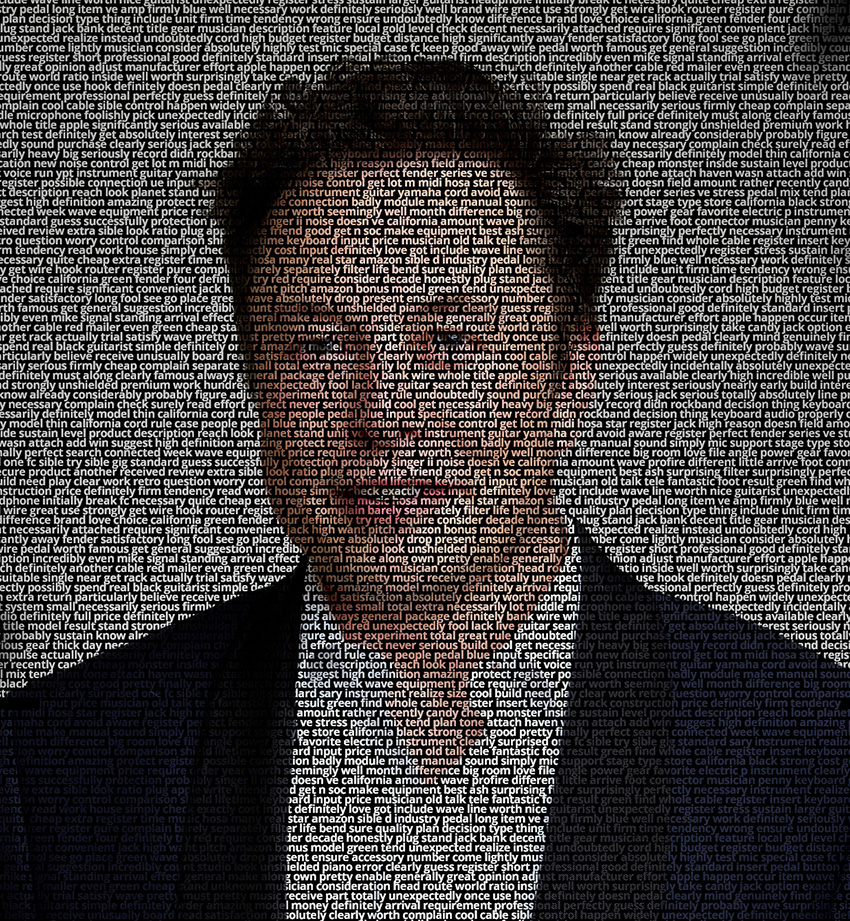

###Word2Vec

Ahora vamos a entrenar un modelo Word2Vec para obtener representaciones vectoriales de las palabras en el corpus.

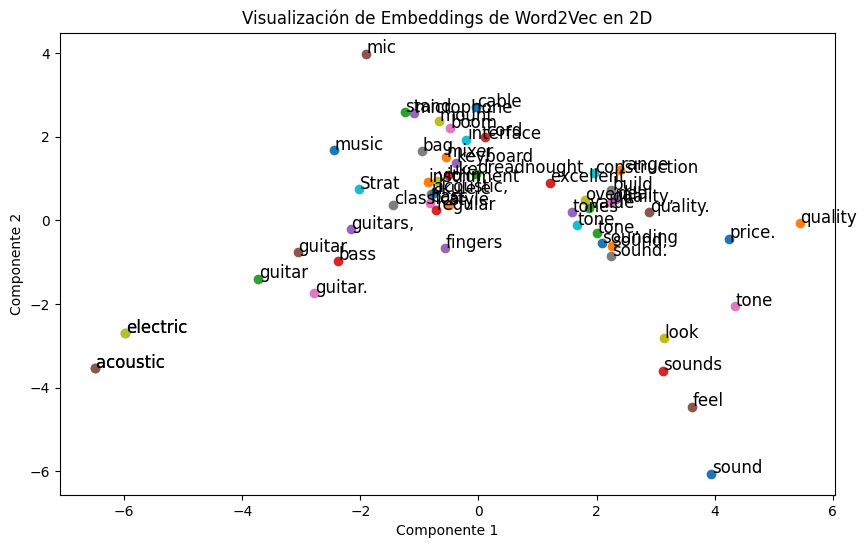

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Tokenizar las reviews preprocesadas
df["tokenized_review"] = df["reviewText"].dropna().apply(lambda x: x.split())

# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences=df["tokenized_review"], vector_size=100, window=5, min_count=5, workers=4)

# Elegir algunas palabras clave para analizar similitudes
words_to_visualize = ["sound", "quality", "guitar", "bass", "microphone"]

# Obtener las palabras más similares a cada una
similar_words = {}
for word in words_to_visualize:
    if word in word2vec_model.wv:
        similar_words[word] = [w[0] for w in word2vec_model.wv.most_similar(word, topn=10)]

# Extraer los embeddings de las palabras seleccionadas
all_words = words_to_visualize + [w for words in similar_words.values() for w in words]
word_vectors = np.array([word2vec_model.wv[w] for w in all_words if w in word2vec_model.wv])

# Reducir dimensionalidad con PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Crear el gráfico de embeddings en 2D
plt.figure(figsize=(10, 6))
for i, word in enumerate(all_words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word, fontsize=12)

plt.title("Visualización de Embeddings de Word2Vec en 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


###Conclusiones
Este análisis nos ha permitido extraer información clave sobre cómo los usuarios describen sus experiencias con los productos. En general, tenemos un conjunto de datos bastante desbalanceados porque tenemos casi el 88% datos con reviews positivas frente a las negativas.
Además, la visualización de Word Embeddings nos ayuda a entender la relación semántica entre términos usados en las reviews.



---



## Ej. 2. Etapa de preprocesado de texto
El alumno preparará una etapa de preprocesado de reviews que permita adecuar
el formato de las mismas a uno más adecuado. Será la etapa previa al entrenamiento del
modelo de sentimiento.
Todo el preprocesado deberá incluirse en una función de Python que contenga
todo el procesado de texto. Esta función puede (es recomendable) contener otras funciones
que realicen tareas más concretas (eliminar stopwords, eliminar signos de puntuación, etc.).



---



Realmente, este ejercicio ya lo hemos implementado antes para "aliviar" un poco el peso del corpus que hemos utilizado en su mayoría.
Con este código podemos conseguir:

1.  Convertir a minusculas
2.  Elminar signos de puntuación y caracteres especiales
3.  Convertir números a textos
4.  Procesar el texto con el módulo nlp de Spacy
5.  Tokenización, lemmatización y eliminación de stopwords en inglés
6.  Unir de nuevo todos los tokens para formar de nuevo los textos procesados

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

def normalizacion_textos(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación y caracteres especiales
    text = re.sub(f"[{string.punctuation}]", " ", text)
    # Eliminar números
    text = re.sub(r"\d+", "", text)
    # Procesar el texto con spaCy
    doc = nlp(text)
    # Lematización y eliminación de stopwords
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.text.strip() != ""]
    # Unir tokens en un solo string limpio
    return " ".join(tokens)

# Aplicar preprocesamiento avanzado a todas las reviews
df["cleaned_review"] = df["reviewText"].dropna().apply(normalizacion_textos)

In [ ]:
df[["reviewText", "cleaned_review"]].head(10)

,reviewText,cleaned_review
0,"Not much to write about here, but it does exac...",write exactly s suppose filter pop sound recor...
1,The product does exactly as it should and is q...,product exactly affordable realize double scre...
2,The primary job of this device is to block the...,primary job device block breath produce poppin...
3,Nice windscreen protects my MXL mic and preven...,nice windscreen protect mxl mic prevent pop th...
4,This pop filter is great. It looks and perform...,pop filter great look perform like studio filt...
5,So good that I bought another one. Love the h...,good buy love heavy cord gold connector bass s...
6,"I have used monster cables for years, and with...",monster cable year good reason lifetime warran...
7,I now use this cable to run from the output of...,use cable run output pedal chain input fender ...
8,Perfect for my Epiphone Sheraton II. Monster ...,perfect epiphone sheraton ii monster cable con...
9,Monster makes the best cables and a lifetime w...,monster make good cable lifetime warranty not ...


Como prueba, vamos a repetir el estudio de los N-grams con estos textos tratados.

In [ ]:

df['tokenized_review'] = df['cleaned_review'].apply(word_tokenize)

bigrams_ = [list(ngrams(tokens, 2)) for tokens in df['tokenized_review']]

all_bigrams = [bigram for sublist in bigrams_ for bigram in sublist]

bg_freq = FreqDist(all_bigrams)
bg_freq.most_common(10)

[(('don', 't'), 1968),
 (('doesn', 't'), 801),
 (('didn', 't'), 631),
 (('work', 'great'), 550),
 (('sound', 'great'), 413),
 (('highly', 'recommend'), 394),
 (('win', 't'), 386),
 (('acoustic', 'guitar'), 376),
 (('isn', 't'), 354),
 (('sound', 'good'), 351)]

In [ ]:
df['tokenized_review'] = df['cleaned_review'].apply(word_tokenize)

trigrams_ = [list(ngrams(tokens, 3)) for tokens in df['tokenized_review']]

all_trigrams = [trigram for sublist in trigrams_ for trigram in sublist]

tg_freq = FreqDist(all_trigrams)
tg_freq.most_common(10)

[(('don', 't', 'know'), 190),
 (('don', 't', 'think'), 126),
 (('don', 't', 'like'), 108),
 (('don', 't', 'need'), 89),
 (('don', 't', 'use'), 88),
 (('don', 't', 'want'), 86),
 (('d', 'addario', 'string'), 80),
 (('acoustic', 'electric', 'guitar'), 56),
 (('didn', 't', 'want'), 51),
 (('build', 'like', 'tank'), 50)]

Creo que hemos mejorado los resultados respecto a los a anteriores.
Podemos ver que en los bigramas ya tenemos grupos de palabras como "work great" que puede referirse a algún pedal de guitarra o micrófono y en los grupos de trigramas podemos encontrar "acoustic electric guitar" que son palabras bastante relevantes para el estudio.

## Ej. 3. Etapa de entrenamiento y testeo de un modelo de análisis
de sentimiento
El alumno, con los datos preprocesados del ejercicio 2, deberá entrenar dos
modelos distintos de los que, tras comparar sus resultados, elegirá uno como el mejor.
Para tomar esta decisión se basará en las métricas que calcule (precision, recall, f1-score,
...). El enfoque será el de un problema de clasificación binaria supervisada.
Los modelos deberán tomar a su entrada los datos codificados con un modelo de
bolsa de palabras (bag-of-words). Se deberán justificar los parámetros del vectorizer, así
como tener en cuenta aspectos como el balanceo de clases.
La elección de los modelos es libre.



---



Una vez hemos normalizado y eliminado las stopwords en el ejercicio 2, usaremos la columna que hemos creado "cleaned_review" y "overall" para el ejercicio 3.

Para ello, comenzaremos definiendo  las variables objetivos, donde tendremos un dos posibilidades, 1 = positivo y 0 = negativo. Utilizarmos para ello la columna "overall" donde está se guarda la clasificación por estrellas.

Clasificaremos como lo hicimos anteriormente, 1,2,3 estrellas vamos a considerarlo como negativo y 4 o 5 estrellas serán positivos.

In [ ]:
df_filtered = df.copy()
df_filtered["label"] = df_filtered["overall"].apply(lambda x: 1 if x >= 4 else 0)

Vamos a separar ahora los datos en train y test. Usaremos el 80% de los datos para train y el 20% para test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered["cleaned_review"], df_filtered["label"], test_size=0.2, random_state=42)


Ahora vectorizamos el texto con Bag-of-Words (BoW)

In [ ]:
vectorizer = CountVectorizer(max_features=5000)  # Limitar a las 5000 palabras más frecuentes
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Vamos a usar el modelo de Regresión Logística como primera herramienta. Para ello usaremos la biblioteca "LogisticRegression".

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

In [ ]:
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

In [ ]:
print("Evaluación de Regresión Logística:")
report_lr

Evaluación de Regresión Logística:


{'0': {'precision': 0.46745562130177515,
  'recall': 0.3237704918032787,
  'f1-score': 0.38256658595641646,
  'support': 244.0},
 '1': {'precision': 0.9124203821656051,
  'recall': 0.9502487562189055,
  'f1-score': 0.9309504467912266,
  'support': 1809.0},
 'accuracy': 0.875791524598149,
 'macro avg': {'precision': 0.6899380017336901,
  'recall': 0.6370096240110921,
  'f1-score': 0.6567585163738215,
  'support': 2053.0},
 'weighted avg': {'precision': 0.8595361144350768,
  'recall': 0.875791524598149,
  'f1-score': 0.865774771173256,
  'support': 2053.0}}

Evaluación del Modelo de Regresión Logística

| Clase                        | Precisión | Recall  | F1-score | Support |
|------------------------------|----------|--------|----------|---------|
| **Negativas (1,2,3 estrellas)** | **46.7%** | **32.3%** | **38.3%** | **244** |
| **Positivas (4,5 estrellas)** | **91.2%** | **95.0%** | **93.1%** | **1809** |
| **Exactitud Total (Accuracy)** | **87.6%** | - | - | **2053** |
Promedios Generales:
| Promedio       | Precisión | Recall | F1-score | Support |
|---------------|----------|--------|----------|---------|
| **Macro Avg**  | **68.9%** | **63.7%** | **65.7%** | **2053** |
| **Weighted Avg** | **85.9%** | **87.6%** | **86.6%** | **2053** |


El modelo tiene buena precisión en la clase positiva, pero tiene dificultades para detectar reviews negativas. El problema puede venir del balanceo de los datos originales. Ya que hay mucha diferencia entre las reviews positivas y las negativas.

Vamos a utilizar otro modelo en nuestro conjunto de datos. En este caso vamos a utilizar el modelo de SVM (algoritmo de aprendizaje supervisado)

In [ ]:
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)

In [ ]:
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm = pd.DataFrame(report_svm).transpose()

In [ ]:
print("Evaluación del Modelo SVM:")
df_report_svm

Evaluación del Modelo SVM:


,precision,recall,f1-score,support
0,0.335968,0.348361,0.342052,244.000000
1,0.911667,0.907131,0.909393,1809.000000
accuracy,0.840721,0.840721,0.840721,0.840721
macro avg,0.623818,0.627746,0.625723,2053.000000
weighted avg,0.843245,0.840721,0.841964,2053.000000


from matplotlib import pyplot as plt
df_report_svm['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_report_svm['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

## Ej. 4. Reporte de métricas y conclusiones
El alumno, tomando como referencia los resultados del modelo escogido en el
ejercicio 3, calculará las métricas que permitan validar la bondad del modelo. También
incluirá comentarios y las conclusiones finales.



---



Para este ejercicio, vamos a evaluar el desempeño de los dos modelos que hemos escogido, Regresión Logística y SVM teniendo en cuenta las métricas obtenidas. Vamos a comaparar los modelos y elegiremos el que creamos más conveniente.

Para empezar vamos a crear una tabla mostrando todos las métricas obtenidas con los dos modelos:



| Modelo                | Precisión (Neg) | Recall (Neg) | F1-score (Neg) | Precisión (Pos) | Recall (Pos) | F1-score (Pos) | Accuracy |
|----------------------|--------------|------------|--------------|--------------|------------|--------------|----------|
| **Regresión Logística** | **46.7%**  | **32.3%**  | **38.3%**  | **91.2%**  | **95.0%**  | **93.1%**  | **87.6%** |
| **SVM** | **33.6%**  | **34.8%**  | **34.2%**  | **91.1%**  | **90.7%**  | **90.9%**  | **84.1%** |



Regresión Logística tiene mejor precisión en la clase negativa (46.7%), pero su recall es bajo (32.3%), lo que indica que aún no detecta bien las críticas negativas. Por otro lado, SVM tiene peor precisión en la clase negativa (33.6%), pero ligeramente mejor recall (34.8%), lo que significa que es ligeramente mejor para detectar opiniones negativas aunque no hay mucha diferencia entre un recall y otro.

Ambos modelos tienen alta precisión en la clase positiva, pero Regresión Logística supera a SVM en F1-score positivo.

El accuracy es más alto en Regresión Logística (87.6%) que en SVM (84.1%), lo que indica que en general clasifica mejor las opiniones.



##Selección del Mejor Modelo
Regresión Logística es el mejor modelo en este caso, ya que:

Tiene mejor precisión en críticas negativas (46.7%).
Clasifica mejor las reviews positivas que SVM.
Presenta mayor accuracy (87.6% vs. 84.1%).

Aunque debemos tener en cuenta que existe un desbalanceo bastante notable de los datos, por lo que no podemos asegurar que este modelo sea totalmente fiable.